## Matrix multiplication from foundations

The *foundations* we'll assume throughout this course are:

- Python
- Python modules (non-DL)
- pytorch indexable tensor, and tensor creation (including RNGs - random number generators)
- fastai.datasets

## Check imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
#export
from exp.nb_00 import *
import operator

def test(a,b,cmp,cname=None):
    cname = getattr(cmp, '__name__', cname)
    assert cmp(a, b), f"{cname}: {a} {b}"
    
def test_eq(a,b): return test(a, b, operator.eq)

In [12]:
test_eq(TEST,'test')

In [ ]:
# To run tests in console:
# ! python run_notebook.py 01_matmul.ipynb

## Get data

In [55]:
#export
from fastai import datasets
from torch import tensor
#from # [code]
import gzip, pickle, torch
import matplotlib as mpl, matplotlib.pyplot as plt
#from # [code]

MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

In [20]:
! ls

00_exports.ipynb			07_batchnorm.ipynb
00_exports-lookntype.ipynb		08_data_block.ipynb
01_matmul-fillblanks-attempt1.ipynb	09b_learner.ipynb
01_matmul-fillblanks.ipynb		09c_add_progress_bar.ipynb
01_matmul.ipynb				09_optimizers.ipynb
01_matmul-lookntype.ipynb		10_augmentation.ipynb
02a_why_sqrt5.ipynb			10b_mixup_label_smoothing.ipynb
02a_why_sqrt5-lookntype.ipynb		10c_fp16.ipynb
02b_initializing.ipynb			11a_transfer_learning.ipynb
02_fully_connected-fillblanks.ipynb	11_train_imagenette.ipynb
02_fully_connected.ipynb		12a_awd_lstm.ipynb
02_fully_connected-lookntype.ipynb	12b_lm_pretrain.ipynb
03_minibatch_training-fillblanks.ipynb	12c_ulmfit.ipynb
03_minibatch_training.ipynb		12_text.ipynb
03_minibatch_training-lookntype.ipynb	audio.ipynb
04_callbacks-fillblanks.ipynb		bleu_metric.ipynb
04_callbacks.ipynb			cyclegan.ipynb
04_callbacks-lookntype.ipynb		cyclegan_ws.ipynb
05a_foundations-fillblanks.ipynb	devise.ipynb
05a_foundations.ipynb			exp
05a_foundations-lookntype.ipynb		images
05_a

In [29]:
path = datasets.download_data(MNIST_URL, ext='.gz'); path

PosixPath('/home/jupyter/.fastai/data/mnist.pkl.gz')

In [40]:
# Extract downloaded data file and load 
with gzip.open(path, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [41]:
# Convert loaded data into torch tensors
x_train,y_train,x_valid,y_valid = map(tensor, [x_train, y_train, x_valid, y_valid])
# Get number of samples, `n`, and number of input features, `c`.
n,c = x_train.shape
# Use the variables defined in this cell to print out the below.
x_train, x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

```
(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))
```

In [42]:
# Check the number of samples against `y_train`'s dimension
assert n == len(y_train)
# Verify that the number of input features is equal to 28**2
assert c == 28**2
# Verify that the smallest class category is 0.
assert y_train.min() == 0
# Verify that the largest class category is 9.
assert y_train.max() == 9

In [49]:
# Set matplotlib image color map to grayscale
mpl.rc('image', cmap='gray')

In [50]:
# Get the first image from the training set
img = x_train[0]

In [51]:
# Reshape above image to tensor of shape (28, 28) and display its type
img = img.view(28, 28); type(img)

torch.Tensor

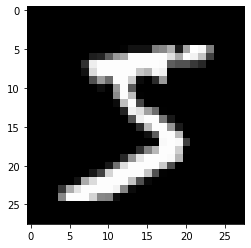

In [54]:
# Plot the above image with matplotlib
plt.imshow(img);

## Initial python model

In [56]:
# Initialize weights of shape (number of input features, 10) with standard normal distribution
weights = torch.randn(c, 10)

In [57]:
# Initialize bias for the above weights matrix with zeros
bias = torch.zeros(10)

#### Matrix multiplication

In [58]:
# Write function to multiply 2 rank-2 tensors, `a` and `b`.
# Use absolutely no broadcasting.
def matmul(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac == br
    res = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(br):
                res[i,j] += a[i,k]*b[k,j]
    return res

In [59]:
# Take the first 5 samples of the validation set and assign it to `m1`
m1 = x_valid[:5]
# Assign `weights` to `m2`
m2 = weights

In [61]:
# Print the shapes of `m1` and `m2`.
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [64]:
# Multiply `m1` and `m2` with `matmul`, call the result `t1`, and time it.
%time t1 = matmul(m1, m2)

CPU times: user 620 ms, sys: 4 ms, total: 624 ms
Wall time: 626 ms


In [65]:
# Print out the shape of `t1`
t1.shape

torch.Size([5, 10])

This is kinda slow - what if we could speed it up by 50,000 times? Let's try!

In [66]:
# Print out the length of the training set
len(x_train)

50000

#### Elementwise ops

Operators (+,-,\*,/,>,<,==) are usually element-wise.

Examples of element-wise operations:

In [70]:
# Create tensor of [10, 6, -4], call it `a`.
a = tensor([10, 6., -4])
# Create tensor of [2, 8, 7], call it `b`.
b = tensor([2, 8., 7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [71]:
# Add `a` and `b`
a + b

tensor([12., 14.,  3.])

In [75]:
# Calculate the fraction of elements where `a` is less than `b`.
(a < b).float().mean()

tensor(0.6667)

In [79]:
# Create the tensor [[1, 2, 3], [4, 5, 6], [7, 8, 9]], call it `m`.
m = torch.arange(1, 10).view(3, 3).float()

Frobenius norm:

$$\| A \|_F = \left( \sum_{i,j=1}^n | a_{ij} |^2 \right)^{1/2}$$

*Hint*: you don't normally need to write equations in LaTeX yourself, instead, you can click 'edit' in Wikipedia and copy the LaTeX from there (which is what I did for the above equation). Or on arxiv.org, click "Download: Other formats" in the top right, then "Download source"; rename the downloaded file to end in `.tgz` if it doesn't already, and you should find the source there, including the equations to copy and paste.

In [83]:
# Calculate the Frobenius norm of `m`
(m * m).sum().sqrt()

tensor(16.8819)

#### Elementwise matmul

In [91]:
# Write function to multiply two rank-2 tensors `a` and `b`.
# Use 2 for-loops and broadcasting.
def matmul(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac == br
    res = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            res[i,j] = (a[i,:] * b[:, j]).sum()
    return res

In [92]:
# Use the above function to multiply `m1` and `m2`.
# Time it by using 10 runs.
%time _ = matmul(m1, m2)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.27 ms


In [88]:
890.1/5

178.02

In [107]:
#export
# Define function to check that 2 floating point tensors are close to each other.
# With a relative tolerance of 1e-3 and an absolute tolernace of 1e-5.
def near(a,b): return torch.allclose(a, b, rtol=1e-3, atol=1e-5)
def test_near(a,b): test(a,b,near)

In [111]:
# Use test_near() to check the result of using the above `matmul`
# to multiply `m1` and `m2` against `t1`.
test_near(matmul(m1, m2), t1)

### Broadcasting

The term **broadcasting** describes how arrays with different shapes are treated during arithmetic operations.  The term broadcasting was first used by Numpy.

From the [Numpy Documentation](https://docs.scipy.org/doc/numpy-1.10.0/user/basics.broadcasting.html):

    The term broadcasting describes how numpy treats arrays with 
    different shapes during arithmetic operations. Subject to certain 
    constraints, the smaller array is “broadcast” across the larger 
    array so that they have compatible shapes. Broadcasting provides a 
    means of vectorizing array operations so that looping occurs in C
    instead of Python. It does this without making needless copies of 
    data and usually leads to efficient algorithm implementations.
    
In addition to the efficiency of broadcasting, it allows developers to write less code, which typically leads to fewer errors.

*This section was adapted from [Chapter 4](http://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/blob/master/nbs/4.%20Compressed%20Sensing%20of%20CT%20Scans%20with%20Robust%20Regression.ipynb#4.-Compressed-Sensing-of-CT-Scans-with-Robust-Regression) of the fast.ai [Computational Linear Algebra](https://github.com/fastai/numerical-linear-algebra) course.*

#### Broadcasting with a scalar

In [112]:
a

tensor([10.,  6., -4.])

In [113]:
# Check which of the elements of `a` is greater than 0
a > 0

tensor([1, 1, 0], dtype=torch.uint8)

How are we able to do a > 0?  0 is being **broadcast** to have the same dimensions as a.

For instance you can normalize our dataset by subtracting the mean (a scalar) from the entire data set (a matrix) and dividing by the standard deviation (another scalar), using broadcasting.

Other examples of broadcasting with a scalar:

In [114]:
# Add 1 to all elements of `a`
a + 1

tensor([11.,  7., -3.])

In [115]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [116]:
# Multiply all elements of `m` with 2.
2 * m

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]])

#### Broadcasting a vector to a matrix

We can also broadcast a vector to a matrix:

In [118]:
# Define a tensor [10, 20, 30], call it `c`.
c = tensor([10, 20., 30]); c

tensor([10., 20., 30.])

In [119]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [120]:
# Print out the shape of `m` and `c`.
m.shape, c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [121]:
# Add `m` and `c` together
m + c

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [122]:
# Add `c` and `m` together
c + m

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

We don't really copy the rows, but it looks as if we did. In fact, the rows are given a *stride* of 0.

In [123]:
# Expand `c` as `m`, and call it `t`.
t = c.expand_as(m)

In [124]:
t

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [125]:
# Add `m` and `t` together.
m + t

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [128]:
# Show how `t` is stored.
t.storage()

 10.0
 20.0
 30.0
[torch.FloatStorage of size 3]

In [130]:
# Print out the stride and shape of `t`.
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

You can index with the special value [None] or use `unsqueeze()` to convert a 1-dimensional array into a 2-dimensional array (although one of those dimensions has value 1).

In [133]:
# Add a new dimension at rank 0 to `c`, using a method.  Not in-place.
c.unsqueeze(0)

tensor([[10., 20., 30.]])

In [134]:
# Add a new dimension at rank 1 to `c`, using a method.  Not in-place.
c.unsqueeze(1)

tensor([[10.],
        [20.],
        [30.]])

In [135]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [136]:
c.shape, c.unsqueeze(0).shape,c.unsqueeze(1).shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

In [140]:
# Print out the size below by indexing `c` with None.
c.shape, c[None,:].shape, c[:,None].shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

```
(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))
```

You can always skip trailling ':'s. And '...' means '*all preceding dimensions*'

In [141]:
# Print out the sizes below by indexing `c` with None.
# Don't use any `:` in the indexing.
c[None,...].shape, c[...,None].shape

(torch.Size([1, 3]), torch.Size([3, 1]))

```
(torch.Size([1, 3]), torch.Size([3, 1]))
```

In [144]:
# Expand `c` as `m` in a way that gives the tensor shown below.
c[:, None].expand_as(m)

tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])

```
tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])
```

In [145]:
# Add `c` to `m` in a way that will return the tensor shown below.
m + c[:,None]

tensor([[11., 12., 13.],
        [24., 25., 26.],
        [37., 38., 39.]])

```
tensor([[11., 12., 13.],
        [24., 25., 26.],
        [37., 38., 39.]])
```

In [146]:
# Index `c` to get the tensor shown below
c[:,None]

tensor([[10.],
        [20.],
        [30.]])

```
tensor([[10.],
        [20.],
        [30.]])
```

#### Matmul with broadcasting

In [154]:
# Write function to multiply two rank-2 tensors `a` and `b`.
# Use 1 for-loop and broadcasting.
def matmul(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac == br
    res = torch.zeros(ar, bc)
    for i in range(ar):
        res[i] = (a[i][:,None] * b).sum(dim=0)
    return res

In [165]:
# Use the function in the above cell to multiply `m1` and `m2`.
# Time it with 10 trials.
%timeit -n 10 _ = matmul(m1, m2)

213 µs ± 18.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [166]:
885000/277

3194.945848375451

In [167]:
# Verify the result of multiplication above is close to `t1`.
test_near(matmul(m1, m2), t1)

#### Broadcasting Rules

In [168]:
# Add new dimension to `c` at rank 0.
c[None,:]

tensor([[10., 20., 30.]])

```
tensor([[10., 20., 30.]])
```

In [169]:
# Print out shape of above tensor
c[None,:].shape

torch.Size([1, 3])

In [170]:
# Add new dimension to `c` at rank 1.
c[:,None]

tensor([[10.],
        [20.],
        [30.]])

```
tensor([[10.],
        [20.],
        [30.]])
```

In [171]:
# Print out the shape of the above tensor.
c[:,None].shape

torch.Size([3, 1])

In [173]:
# Multiply two appropriately indexed `c` to get the tensor shown below.
c[None,:] * c[:,None]

tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]])

```
tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]])
```

In [175]:
# Apply an inequality to two appropriately indexed `c` to get 
# the tensor shown below.
c[None,:] > c[:,None]

tensor([[0, 1, 1],
        [0, 0, 1],
        [0, 0, 0]], dtype=torch.uint8)

```
tensor([[0, 1, 1],
        [0, 0, 1],
        [0, 0, 0]], dtype=torch.uint8)
```

When operating on two arrays/tensors, Numpy/PyTorch compares their shapes element-wise. It starts with the **trailing dimensions**, and works its way forward. Two dimensions are **compatible** when

- they are equal, or
- one of them is 1, in which case that dimension is broadcasted to make it the same size

Arrays do not need to have the same number of dimensions. For example, if you have a `256*256*3` array of RGB values, and you want to scale each color in the image by a different value, you can multiply the image by a one-dimensional array with 3 values. Lining up the sizes of the trailing axes of these arrays according to the broadcast rules, shows that they are compatible:

    Image  (3d array): 256 x 256 x 3
    Scale  (1d array):             3
    Result (3d array): 256 x 256 x 3

The [numpy documentation](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html#general-broadcasting-rules) includes several examples of what dimensions can and can not be broadcast together.

### Einstein summation

Einstein summation (`einsum`) is a compact representation for combining products and sums in a general way. From the numpy docs:

"The subscripts string is a comma-separated list of subscript labels, where each label refers to a dimension of the corresponding operand. Whenever a label is repeated it is summed, so `np.einsum('i,i', a, b)` is equivalent to `np.inner(a,b)`. If a label appears only once, it is not summed, so `np.einsum('i', a)` produces a view of a with no changes."

In [188]:
# c[i,j] += a[i,k] * b[k,j]
# c[i,j] = (a[i,:] * b[:,j]).sum()
# Write function to multiply two rank-2 tensors `a`, `b` using `einsum`.
def matmul(a,b): return torch.einsum('ik, kj -> ij', a, b)

In [189]:
# Multiply `m1` and `m2` with the above function.
# Time it using 10 trials.
%timeit -n 10 matmul(m1, m2)

36.3 µs ± 7.84 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [184]:
885000/55

16090.90909090909

In [190]:
# Verify that the result of the above multiplication is close to `t1`.
test_near(matmul(m1, m2), t1)

### pytorch op

We can use pytorch's function or operator directly for matrix multiplication.

In [191]:
# Use tensor method to multiply `m1` and `m2`. Call it `t2`.
# Time it over 10 trials.
%timeit -n 10 t2 = m1.matmul(m2)

The slowest run took 8.10 times longer than the fastest. This could mean that an intermediate result is being cached.
11.7 µs ± 13.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [192]:
# time comparison vs pure python:
885000/18

49166.666666666664

In [193]:
# Use `@` to multiply `m1` and `m2`. Call it `t2`.
t2 = m1@m2

In [194]:
# Verify that `t1` and `t2` are close.
test_near(t2, t1)

In [195]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [196]:
# Place `m1` and `m2` on GPU, and call them `m3` and `m4`, respectively.
m3, m4 = m1.cuda(), m2.cuda()

In [197]:
# Use tensor method to multiply `m3` and `m4`.  Call it `t3`.
t3 = m3.matmul(m4)

In [198]:
# Time the above cell over 10 trials.
%timeit -n 10 t3 = m3.matmul(m4)

11.7 µs ± 7.01 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Export

In [ ]:
!python notebook2script.py 01_matmul.ipynb

Traceback (most recent call last):
  File "notebook2script.py", line 3, in <module>
    import json,fire,re
ModuleNotFoundError: No module named 'fire'
